In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append("../")

from src.constants import *
from src.training_utils.dataset import *
from src.training_utils.training import train_model, get_model_instance_segmentation

In [3]:
import os
import torch
import numpy as np
import pandas as pd
from PIL import Image

import torchvision
from torchvision import transforms as T

In [4]:
train_df = pd.read_csv("/home/nacho/TFI-Cazcarra/data/csv/augmented_train_diagramas.csv", 
                       header=None)
train_df.columns = ['image_path', 'xmin', 'ymin', 'xmax', 'ymax', 'label']

test_df = pd.read_csv("/home/nacho/TFI-Cazcarra/data/csv/augmented_test_diagramas.csv")

In [5]:
le_dict = get_encoder_dict(CLASSES_CSV)
le_dict

{'tabla': 3,
 'muchos_opcional': 2,
 'muchos_obligatorio': 1,
 'uno_opcional': 5,
 'uno_obligatorio': 4}

In [6]:
train_df['label_transformed'] = train_df['label'].apply(lambda x: le_dict[x])
test_df['label_transformed'] = test_df['label'].apply(lambda x: le_dict[x])

In [7]:
# train on the GPU or on the CPU, if a GPU is not available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
num_classes = len(le_dict)+1 

dataset = PennFudanDataset(csv=train_df, images_dir=IMAGES_DIR)
dataset_test = PennFudanDataset(csv=test_df, images_dir=IMAGES_DIR)

In [8]:
data_loader = get_dataloader(dataset, batch_size=2, shuffle=True)
data_loader_test = get_dataloader(dataset_test, batch_size=1, shuffle=False)

## Training model

In [ ]:
train = True
epochs = 75

In [ ]:
model = get_model_instance_segmentation(num_classes=num_classes, model_type="faster-rcnn")
model.to(device)

In [ ]:
params = [p for p in model.parameters() if p.requires_grad]
# override_path = f"{PATH}/data/models/model_best_test.pt"

In [ ]:
if train:
    train_model(model=model, data_loader=data_loader, data_loader_test=data_loader_test, 
                num_epochs=epochs, device=device, params=params)

## Save model
https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
save_last = True

In [ ]:
# if save_last:
#     model_name = model.__class__.__name__.lower()
#     PATH_TO_SAVE_MODEL = f"{PATH}/data/models/model_{model_name}_final.pt"

#     save_model(path_to_save, model, epoch, loss_value)

## Testing

In [11]:
import cv2
import PIL
from IPython.display import display

def get_class_name(num_label, le_dict):
    reversed_le_dict = {v:k for k,v in le_dict.items()}
    return reversed_le_dict[num_label]

def draw_bbox(img, xmin, ymin, xmax, ymax, score, label): 
    txt = get_class_name(label, le_dict) + ' ' + str(score)
    img = cv2.putText(img, txt, (int(xmin), int(ymin)),
                      cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,255), 1)

    return cv2.rectangle(img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), 
                         (255,0,0), 1)

In [12]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

326.5111389160156 376.433349609375 499.7178039550781 524.0186157226562
728.9514770507812 145.14466857910156 897.0526123046875 340.77911376953125
334.6254577636719 140.6202850341797 490.9657897949219 267.270751953125
1042.576904296875 437.9519958496094 1216.65283203125 564.6492309570312
1059.27587890625 93.05132293701172 1200.873046875 267.5467834472656
714.3984985351562 280.1997375488281 737.5396728515625 302.3727111816406
1117.7227783203125 260.24273681640625 1142.4500732421875 283.780517578125
13.560237884521484 196.723388671875 195.13555908203125 460.79052734375
713.6123046875 231.27415466308594 737.6660766601562 254.6134490966797
1116.9443359375 416.6401672363281 1143.982177734375 443.0552673339844
713.599853515625 181.6018829345703 738.0903930664062 206.4236602783203
486.4549255371094 191.14523315429688 511.9436950683594 218.22799682617188
497.5954895019531 463.3062438964844 519.6406860351562 485.4121398925781
892.9185791015625 230.83485412597656 919.1795043945312 256.535980224609

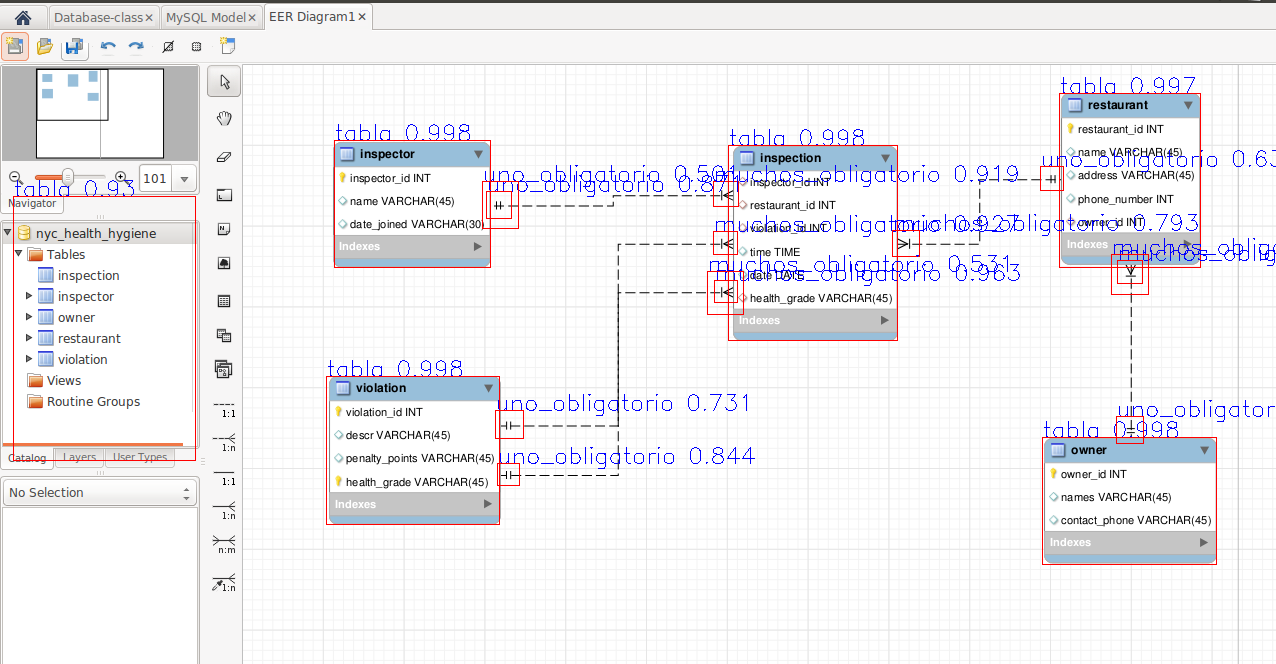

495.1478271484375 902.443115234375 623.2440795898438 1020.510986328125
608.0210571289062 11.933391571044922 792.11962890625 242.87850952148438
243.63092041015625 19.781816482543945 405.10882568359375 225.3229217529297
7.17998743057251 683.6128540039062 163.58360290527344 881.6536254882812
767.1139526367188 689.5342407226562 927.84033203125 877.2030639648438
3.7589399814605713 411.7691955566406 189.72825622558594 601.2323608398438
318.89923095703125 904.0635986328125 472.73956298828125 1021.0848999023438
380.40576171875 376.8978271484375 567.6503295898438 758.919677734375
82.68611907958984 389.37139892578125 109.4036636352539 415.1876220703125
550.6121215820312 611.9929809570312 587.308837890625 643.3351440429688
488.3355407714844 748.9050903320312 514.9630126953125 774.914794921875
537.3870239257812 606.8209838867188 593.55224609375 647.8827514648438
310.2132873535156 218.0640869140625 341.118408203125 248.32562255859375
156.913818359375 764.2394409179688 182.56333923339844 791.3109130

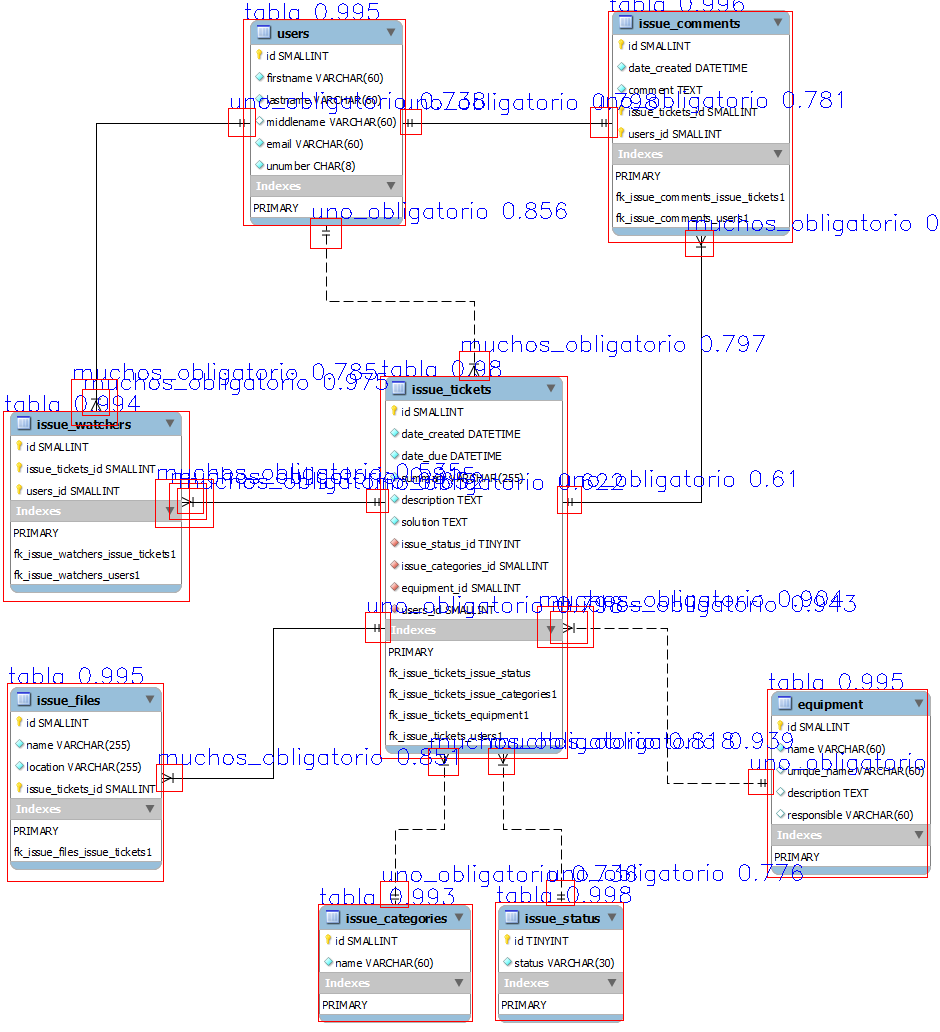

48.388519287109375 29.087154388427734 192.22586059570312 174.40057373046875
281.0369567871094 355.1215515136719 408.3638916015625 441.97576904296875
74.1114730834961 295.1626892089844 222.61839294433594 496.92413330078125
491.6288146972656 383.9216613769531 622.162353515625 470.4591064453125
636.8472290039062 223.3790740966797 789.1002807617188 435.42919921875
282.35906982421875 20.876585006713867 439.77093505859375 293.5789489746094
485.9401550292969 23.489055633544922 639.4886474609375 193.42430114746094
332.29168701171875 336.7572021484375 354.4838562011719 357.3604736328125
406.3334655761719 386.02825927734375 427.05841064453125 409.2416687011719
268.4213562011719 195.0973663330078 290.4111633300781 219.8979034423828
351.79327392578125 298.7059631347656 374.03668212890625 318.99713134765625
110.04825592041016 170.9651641845703 130.83700561523438 192.5821990966797
263.3002014160156 100.73380279541016 289.2302551269531 128.46270751953125
189.81253051757812 89.06051635742188 212.43299

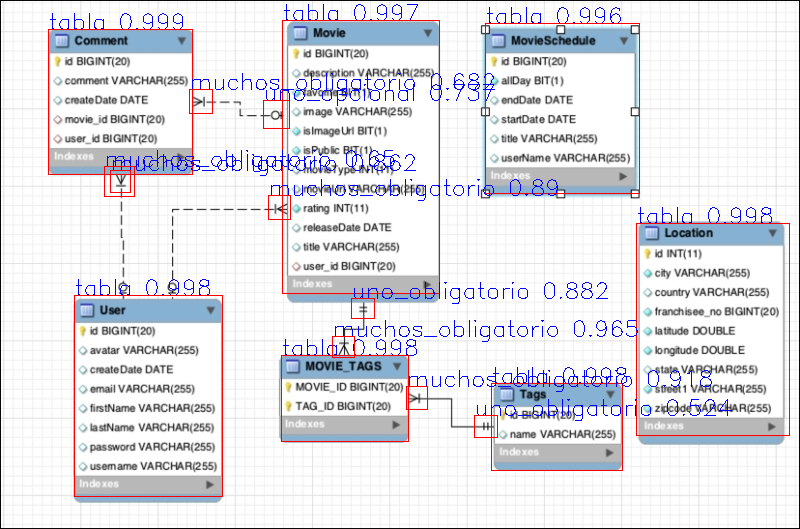

537.2346801757812 499.31097412109375 694.5504760742188 816.5055541992188
742.6227416992188 126.35801696777344 898.3591918945312 469.65545654296875
276.5531005859375 115.89845275878906 433.8506774902344 612.1714477539062
520.3789672851562 645.3584594726562 546.541015625 670.4885864257812
426.0941162109375 290.39178466796875 452.0989074707031 315.6621398925781
686.7205200195312 644.6707763671875 712.5018920898438 671.53125
423.88330078125 445.4666748046875 451.2554016113281 473.80303955078125
722.0737915039062 289.8048400878906 752.541259765625 317.93865966796875
235.33383178710938 841.30078125 268.0276794433594 871.224609375


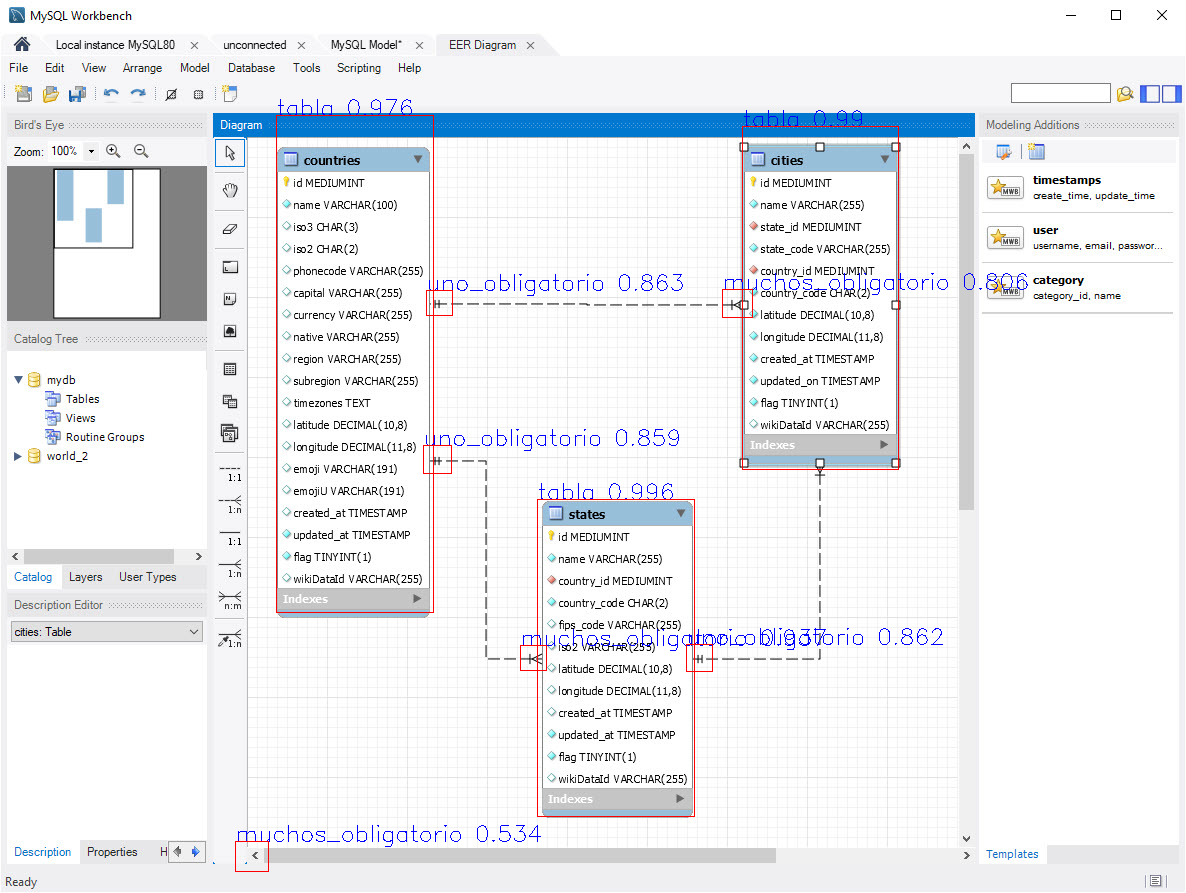

828.7411499023438 417.2950744628906 994.1842041015625 635.0490112304688
45.91590881347656 453.4649963378906 203.3002166748047 617.1760864257812
386.2039794921875 331.10650634765625 542.8876342773438 470.3400573730469
436.6196594238281 24.756790161132812 658.2853393554688 218.6267852783203
57.194950103759766 18.7301025390625 260.2323913574219 225.6110076904297
870.498779296875 56.601318359375 1085.11474609375 256.2339782714844
358.8138732910156 363.84942626953125 390.22406005859375 390.6083679199219
796.4996337890625 474.1813049316406 832.9765014648438 507.1719970703125
108.87610626220703 422.7552490234375 138.98167419433594 454.49920654296875
796.4743041992188 546.04931640625 832.8237915039062 581.68505859375
660.9423217773438 107.8871841430664 692.5905151367188 134.976318359375
201.81590270996094 549.2568969726562 234.009521484375 579.8198852539062
198.7942352294922 493.1865539550781 235.24887084960938 525.138671875
845.1210327148438 104.20722198486328 880.520751953125 137.75198364257

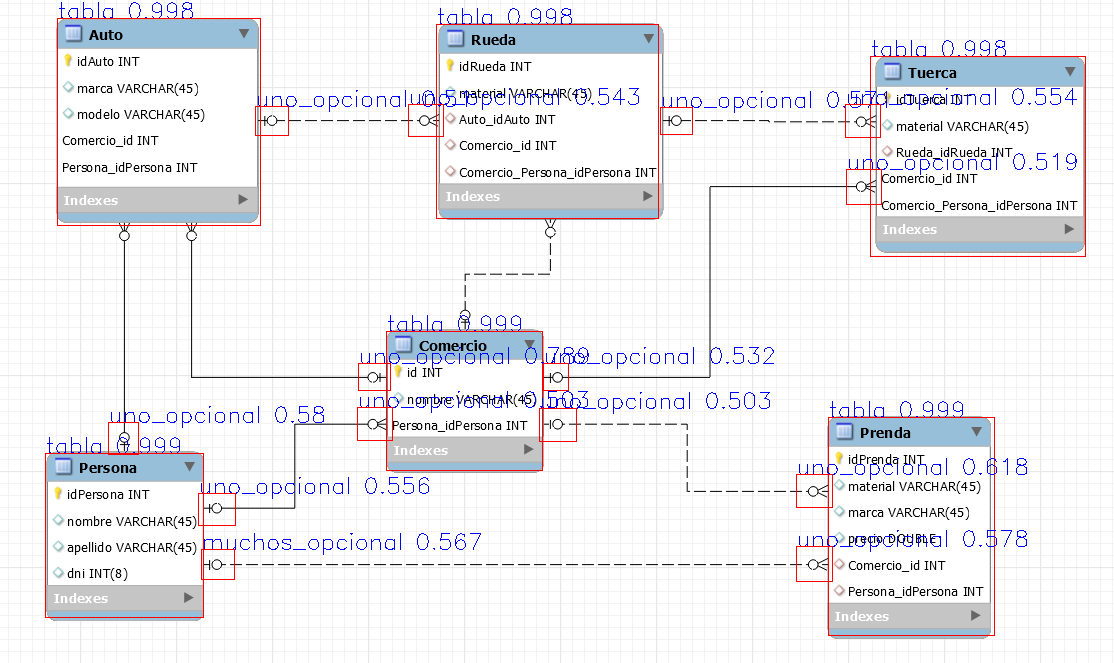

362.46923828125 298.0982360839844 519.734619140625 457.8038330078125
565.6393432617188 190.06277465820312 731.6236572265625 330.2091369628906
564.7752685546875 409.54559326171875 749.0982055664062 669.7118530273438
889.4966430664062 319.7847900390625 1062.99462890625 623.4978637695312
869.123779296875 452.23260498046875 895.848876953125 476.77691650390625
519.1753540039062 364.7170715332031 548.764404296875 390.15167236328125
542.529052734375 527.8318481445312 571.3335571289062 555.9735717773438
962.8629150390625 608.8338012695312 988.18505859375 633.0575561523438
739.9693603515625 529.7554321289062 762.20654296875 555.0034790039062
1005.5001831054688 609.3761596679688 1029.284912109375 630.5603637695312
636.63623046875 329.1685791015625 660.8030395507812 350.1429138183594
922.3076782226562 610.3074951171875 946.6998901367188 631.2466430664062
513.711181640625 358.5941467285156 554.5658569335938 396.76953125
864.5942993164062 444.12493896484375 899.2421875 484.7039794921875
734.9063110

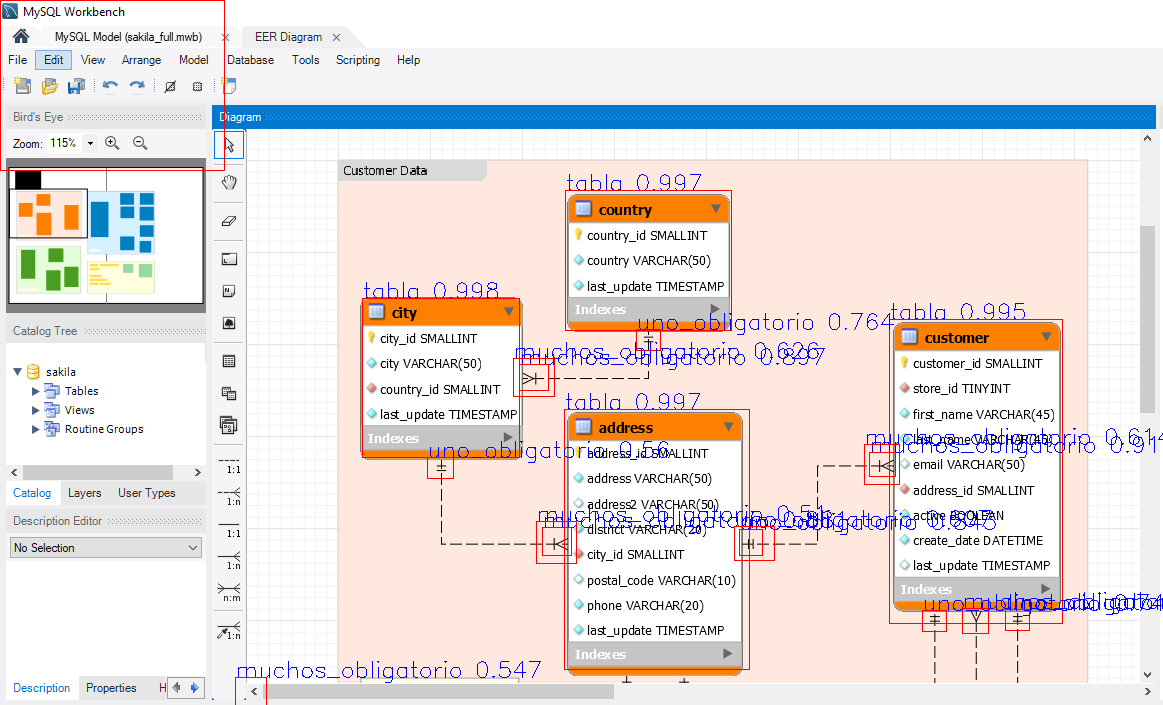

In [13]:
for i in range(len(dataset_test)):
    tensor_image = dataset_test.__getitem__(i)[0]
    to_pil = T.ToPILImage()
    pil_image = to_pil(tensor_image)
    predictions = model([tensor_image])
    image = pil_image
    for prediction in predictions:
        for box, score, label in zip(prediction['boxes'],prediction['scores'],prediction['labels']):
            score = round(score.item(), 3)
            label = label.item()
            if score < 0.5:
                break
            xmin = box[0].item()
            ymin = box[1].item()
            xmax = box[2].item()
            ymax = box[3].item()
            print(xmin, ymin, xmax, ymax)
            if isinstance(image, PIL.Image.Image):
                image = draw_bbox(np.array(image), xmin, ymin, xmax, ymax, score, label)
            else:
                image = draw_bbox(image, xmin, ymin, xmax, ymax, score, label)
        display(Image.fromarray(image))

## Load the two final models & calculate AP for them
- https://torchmetrics.readthedocs.io/en/stable/classification/average_precision.html
- https://torchmetrics.readthedocs.io/en/stable/retrieval/map.html

In [9]:
model = get_model_instance_segmentation(len(le_dict)+1, "faster-rcnn")
model_name = model.__class__.__name__.lower()
PATH_TO_LOAD_MODEL = f"/home/nacho/TFI-Cazcarra/data/models/best_model_{model_name}.pt"

model_obj = torch.load(PATH_TO_LOAD_MODEL)
model.load_state_dict(model_obj['model_state_dict'])

/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/nacho/TFI-Cazcarra/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Instancing model faster-rcnn. Trainable parameters: 41532886


<All keys matched successfully>

In [10]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
from torchmetrics.detection.mean_ap import MeanAveragePrecision

In [ ]:
# En batch mata el kernel; hay que intentar hacerlo
test_tensor_images = [dataset_test.__getitem__(i)[0] for i in range(len(dataset_test))]
predictions = model(test_tensor_images)

In [ ]:
len(predictions)